In [92]:
import pandas as pd
import glob
import os

In [89]:
# -----------------------------
# Load data
# -----------------------------
df_a2 = pd.read_csv("newData/Results Double Damage/Damage 55%/A2_history_output.csv")
df_s11 = pd.read_csv("newData/Results Double Damage/Damage 55%/S11_history_output.csv")
df_u2 = pd.read_csv("newData/Results Double Damage/Damage 55%/U2_history_output.csv")

In [118]:
# Summary statistik A2 per Model Index dan Node
summary_df_a2 = (
    df_a2.groupby(["Model Index"])["A2"]
      .agg([
          "mean",
          "std",
          #"min",
          #"max",
          "var",
          "median",
          "skew"
      ])
      .reset_index()
)
# Rename biar rapi
summary_df_a2.columns = [
    "Model_Index",
    "mean_A2", "std_A2", "var_A2", "median_A2",
    "skew_A2"
]

# Tambahkan kolom default
summary_df_a2["damage_type"] = 1
summary_df_a2["severity_level"] = 10

# Summary statistik S11 per Model Index dan Node
summary_df_s11 = (
    df_s11.groupby(["Model Index"])["S11"]
      .agg([
          "mean",
          "std",
          #"min",
          #"max",
          "var",
          "median",
          "skew"
      ])
      .reset_index()
)
# Rename biar rapi
summary_df_s11.columns = [
    "Model_Index",
    "mean_S11", "std_S11", "var_S11", "median_S11",
    "skew_S11"
]

# Tambahkan kolom default
#summary_df_s11["damage_type"] = 0
#summary_df_a2["severity_level"] = 9
# Summary statistik U2 per Model Index dan Node
summary_df_u2 = (
    df_u2.groupby(["Model Index"])["U2"]
      .agg([
          "mean",
          "std",
          #"min",
          #"max",
          "var",
          "median",
          "skew"
      ])
      .reset_index()
)
# Rename biar rapi
summary_df_u2.columns = [
    "Model_Index",
    "mean_U2", "std_U2", "var_U2", "median_U2",
    "skew_U2"
]

# Tambahkan kolom default
#summary_df_a2["damage_type"] = 0
#summary_df_a2["severity_level"] = 9

In [91]:
summary_df_merge = (
    summary_df_a2.merge(summary_df_s11, on=["Model_Index"])
       .merge(summary_df_u2, on=["Model_Index"])
)
summary_df_merge.to_csv("Stat1/Stat_1_10.csv", index=False)

In [ ]:
#### Menggabungkan#####

In [93]:

# Tentukan folder tempat file CSV berada
folder_path = r"Stat1"    # ganti sesuai folder kamu

# Ambil semua file CSV dalam folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Baca dan gabungkan semua CSV
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Gabungkan semua dataframe
df_all = pd.concat(df_list, ignore_index=True)

# Simpan jadi satu file CSV
df_all.to_csv("Stat1/Stat_Merge.csv", index=False)

In [ ]:
## Let's go pikachu

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("Stat1/Stat_Merge.csv")
df

,Model_Index,mean_A2,std_A2,var_A2,median_A2,skew_A2,damage_type,severity_level,mean_S11,std_S11,var_S11,median_S11,skew_S11,mean_U2,std_U2,var_U2,median_U2,skew_U2
0,1,-0.001569,0.306343,0.093846,0.0,-1.413434,0,0,1.868976e+06,1.512193e+07,2.286728e+14,157933.745,0.010075,-0.000147,0.000743,5.526321e-07,-0.000210,1.723039
1,2,-0.001569,0.306343,0.093846,0.0,-1.413434,0,0,1.868976e+06,1.512193e+07,2.286728e+14,157933.745,0.010075,-0.000147,0.000743,5.526321e-07,-0.000210,1.723039
2,3,-0.001564,0.306360,0.093856,0.0,-1.413872,0,0,1.868854e+06,1.512247e+07,2.286890e+14,158352.980,0.010311,-0.000147,0.000743,5.525961e-07,-0.000210,1.723954
3,4,-0.001564,0.306360,0.093856,0.0,-1.413872,0,0,1.868854e+06,1.512247e+07,2.286890e+14,158352.980,0.010311,-0.000147,0.000743,5.525961e-07,-0.000210,1.723954
4,5,-0.001564,0.306360,0.093856,0.0,-1.413874,0,0,1.868854e+06,1.512247e+07,2.286890e+14,158353.105,0.010311,-0.000147,0.000743,5.525962e-07,-0.000210,1.723955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,108,-0.001218,0.284014,0.080664,0.0,-1.407213,1,9,9.311457e+05,1.458851e+07,2.128246e+14,0.000,0.120867,-0.000268,0.000552,3.046490e-07,-0.000263,0.809489
2108,109,-0.001218,0.284015,0.080665,0.0,-1.407217,1,9,9.311395e+05,1.458851e+07,2.128247e+14,0.000,0.120868,-0.000268,0.000552,3.046498e-07,-0.000263,0.809500
2109,110,-0.001215,0.283977,0.080643,0.0,-1.406799,1,9,9.312118e+05,1.458849e+07,2.128241e+14,0.000,0.120853,-0.000268,0.000552,3.046299e-07,-0.000263,0.809253
2110,111,-0.001029,0.272833,0.074438,0.0,-1.355573,1,9,9.313051e+05,1.458836e+07,2.128203e+14,0.000,0.120866,-0.000268,0.000551,3.040320e-07,-0.000263,0.806378


In [120]:
# -----------------------------
# Siapkan Input & Output
# -----------------------------
X = df.drop(columns=["Model_Index", "severity_level"], errors="ignore").values  # damage_type tetap masuk input
y = df["severity_level"].values

In [121]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [122]:
# Normalisasi input
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [123]:
# Encode target
num_classes = len(np.unique(y))
y_cat = to_categorical(y-1, num_classes=num_classes)  # asumsi severity mulai dari 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(Xs, y_cat, test_size=0.2, random_state=42)

In [124]:
y_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [125]:
# -----------------------------
# Bangun Neural Network
# -----------------------------
model = models.Sequential([
    layers.Dense(32, activation="relu", input_shape=(Xs.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

C:\Users\AkingAyaAyesh\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# -----------------------------
# Training
# -----------------------------
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100000,
                    batch_size=8,
                    verbose=1)


Epoch 1/100000
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0791 - loss: 2.4688 - val_accuracy: 0.1095 - val_loss: 2.3929
Epoch 2/100000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0962 - loss: 2.3881 - val_accuracy: 0.1154 - val_loss: 2.3797
Epoch 3/100000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1295 - loss: 2.3720 - val_accuracy: 0.1272 - val_loss: 2.3723
Epoch 4/100000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1249 - loss: 2.3615 - val_accuracy: 0.1657 - val_loss: 2.3666
Epoch 5/100000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1488 - loss: 2.3571 - val_accuracy: 0.1479 - val_loss: 2.3533
Epoch 6/100000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1564 - loss: 2.3433 - val_accuracy: 0.1509 - val_loss: 2.3400
Epoch 7/100000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1748 - loss: 2.3250 - val_accuracy: 0.1154 - val_loss: 2.3321
Epoch 8/100000
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1450 -

In [116]:
# Evaluasi
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (PCA features + damage_type): {acc:.3f}")

Test Accuracy (PCA features + damage_type): 0.470


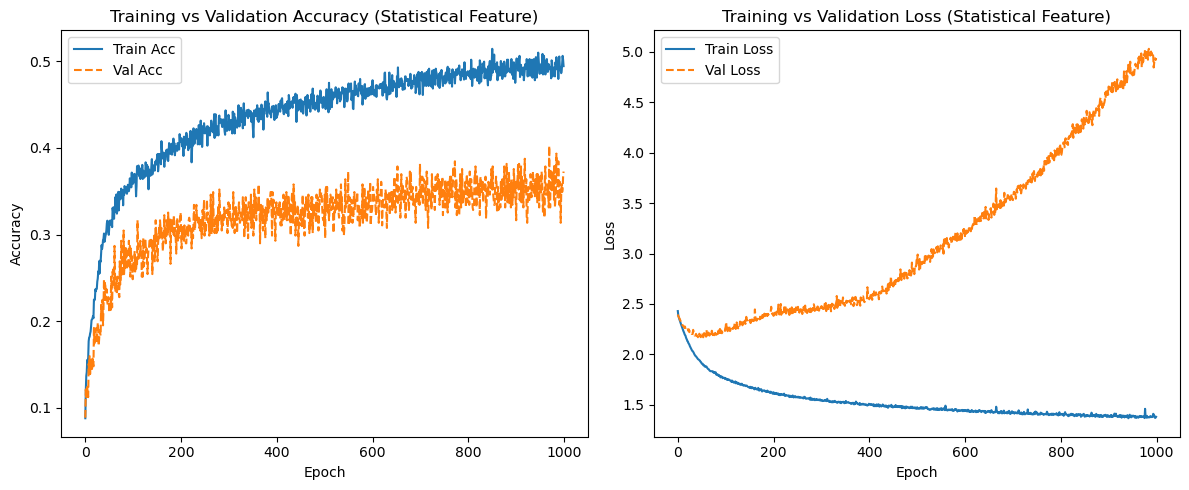

In [117]:
# -----------------------------
# Plot Training Curve
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc", linestyle="--")
plt.title("Training vs Validation Accuracy (Statistical Feature)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss", linestyle="--")
plt.title("Training vs Validation Loss (Statistical Feature)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("nn_pca_damage_type.png", dpi=300)
plt.show()